In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

In [2]:
EXCEL_PATH = "/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/data/daily_backtest_btc_df.csv"

In [3]:
import pandas as pd
from backtester import Backtester, MLStrategy
from strategies.simpleML_stragies import SimpleCatBoost

strategy_class = SimpleCatBoost

initial_cash = 10000

# Load all sheet names (one per asset)
xls = pd.read_csv(EXCEL_PATH)
xls.drop_duplicates(inplace=True)


In [4]:
xls

,DATES,price,true_1d_log_return,prediction_1,prediction_2
0,2023-06-03 00:00:00+00:00,272.195261,0.000600,0,1
1,2023-06-04 00:00:00+00:00,270.729441,0.000500,1,1
2,2023-06-05 00:00:00+00:00,270.864833,-0.049498,0,0
3,2023-06-06 00:00:00+00:00,257.784096,0.052097,1,1
4,2023-06-07 00:00:00+00:00,271.569962,-0.028699,0,0
...,...,...,...,...,...
781,2025-07-23 00:00:00+00:00,1196.727035,-0.008400,0,0
782,2025-07-24 00:00:00+00:00,1186.717129,-0.009700,1,1
783,2025-07-25 00:00:00+00:00,1175.262192,-0.002900,0,0
784,2025-07-26 00:00:00+00:00,1171.859038,0.006000,1,1


In [5]:
xls.set_index("DATES", inplace=True)

In [6]:
xls.columns

Index(['price', 'true_1d_log_return', 'prediction_1', 'prediction_2'], dtype='object')

Columns in 'xls' DataFrame before backtesting: ['price', 'true_1d_log_return', 'prediction_1', 'prediction_2']

📊 Performance Report for price
total_net_return: 341.5781
annualized_return: 5.5119
sharpe: 8.11
max_drawdown: -0.0298
avg_trade_return: 0.01129
median_trade_return: -0.0004
avg_trade_return_long: N/A
median_trade_return_long: N/A
avg_trade_return_short: 0.01129
median_trade_return_short: N/A
skewness: 2.507
num_trades: 212
total_fees_paid: 0.1696
fees_as_pct_of_gross: 2.82


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


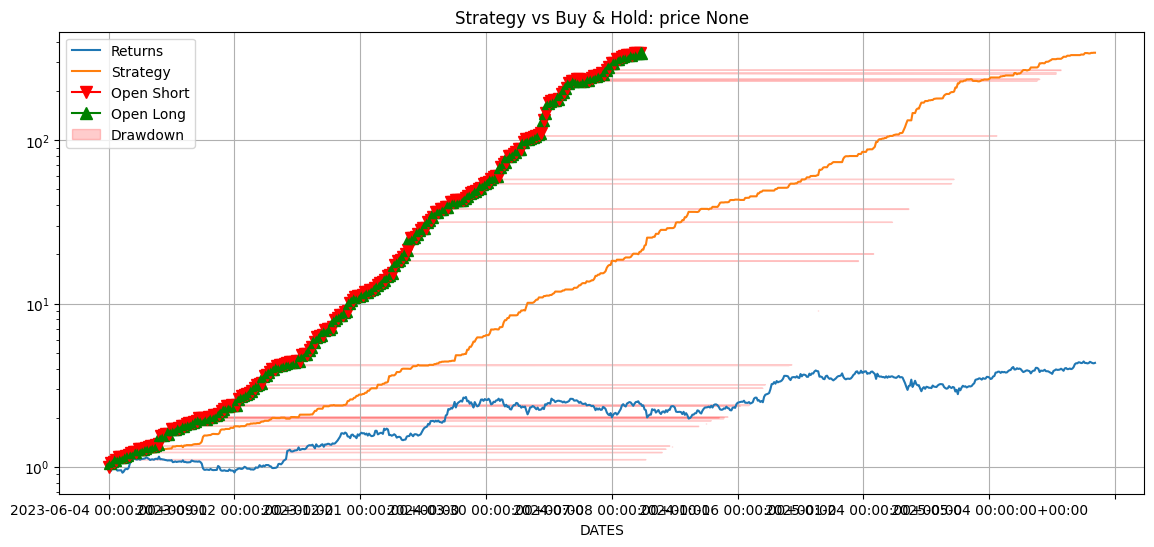

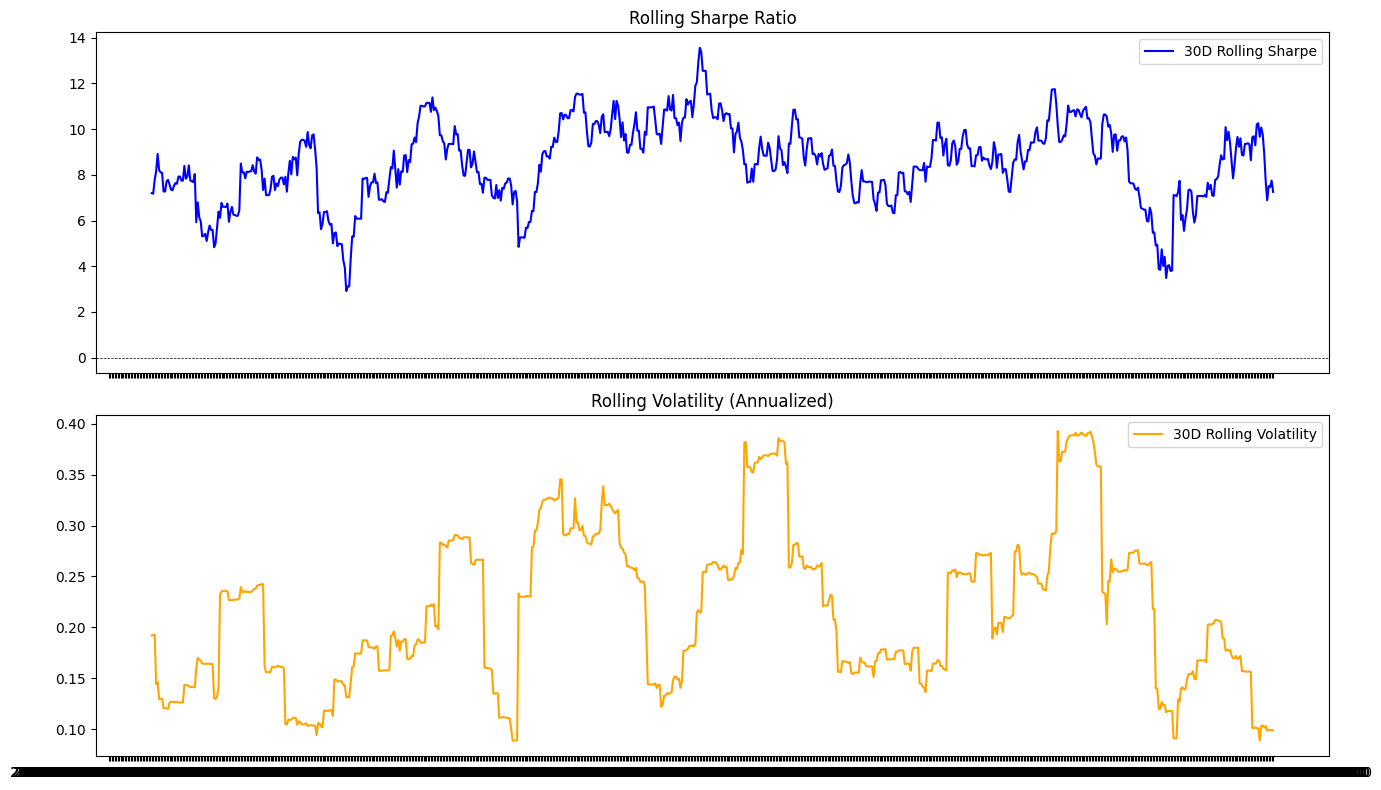

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [7]:
print("Columns in 'xls' DataFrame before backtesting:", xls.columns.tolist())

# Create an instance of the MLStrategy
ml_strategy = MLStrategy(prediction_column='prediction_2')

# Initialize and run the backtester
bt = Backtester(xls, ml_strategy)
bt.run()

# Generate your full report
bt.generate_report()